<a href="https://colab.research.google.com/github/shazzad-hasan/ethereum-fraud-detection/blob/main/data/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ethereum-fraud-detection/data/address_data_combined_ts.csv')
df.head()

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Unique Received From Addresses,min value received,max value received,avg val received,...,adjusted_eth_value__absolute_sum_of_changes,adjusted_eth_value__mean_abs_change,adjusted_eth_value__energy_ratio_by_chunks__num_segments_10__segment_focus_0,adjusted_eth_value__sum_values,adjusted_eth_value__abs_energy,adjusted_eth_value__ratio_value_number_to_time_series_length,adjusted_eth_value__quantile__q_0.1,adjusted_eth_value__count_below__t_0,adjusted_eth_value__count_above__t_0,adjusted_eth_value__median
0,1,0x87d884aaa6ff9e9b6014631b0abae80b53953fb8,1,5151.68,15159.08,71235.62,1,0.010000,0.020000,0.013367,...,0.129900,0.008119,0.358576,0.032100,0.001400,0.470588,0.000000,0.647059,0.941176,0.000
1,2,0xd42393df90d582bd8a5493171f0173e3a017d391,1,1179.02,1124.89,25126.45,13,0.000000,0.750000,0.176667,...,7.669778,0.365228,0.020237,-0.284889,3.335466,0.409091,-0.267421,0.363636,0.681818,0.150
2,3,0x3025c36d8a9620d3df89e9e9b1acbdfd639a6f37,1,361.73,0.00,723.47,1,4.999916,4.999916,4.999916,...,7.508992,3.754496,0.666738,0.000840,37.494722,1.000000,-2.505261,0.666667,0.333333,-2.490
3,4,0x6309f709faad518fc158af4c14edfa7b06424770,1,0.00,0.00,0.00,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
4,5,0x3d020954e30c3d40b7f0c533cf198bc10dd45a49,1,14280.60,1479.86,45357.57,21,0.035000,0.200000,0.099286,...,3.404658,0.162127,0.006660,0.000342,4.594823,0.409091,0.050000,0.045455,0.954545,0.085


In [4]:
df.shape

(13920, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13920 entries, 0 to 13919
Data columns (total 25 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Index                                                                         13920 non-null  int64  
 1   Address                                                                       13920 non-null  object 
 2   FLAG                                                                          13920 non-null  int64  
 3   Avg min between sent tnx                                                      13920 non-null  float64
 4   Avg min between received tnx                                                  13920 non-null  float64
 5   Time Diff between first and last (Mins)                                       13920 non-null  float64
 6   Unique Received From Addresses

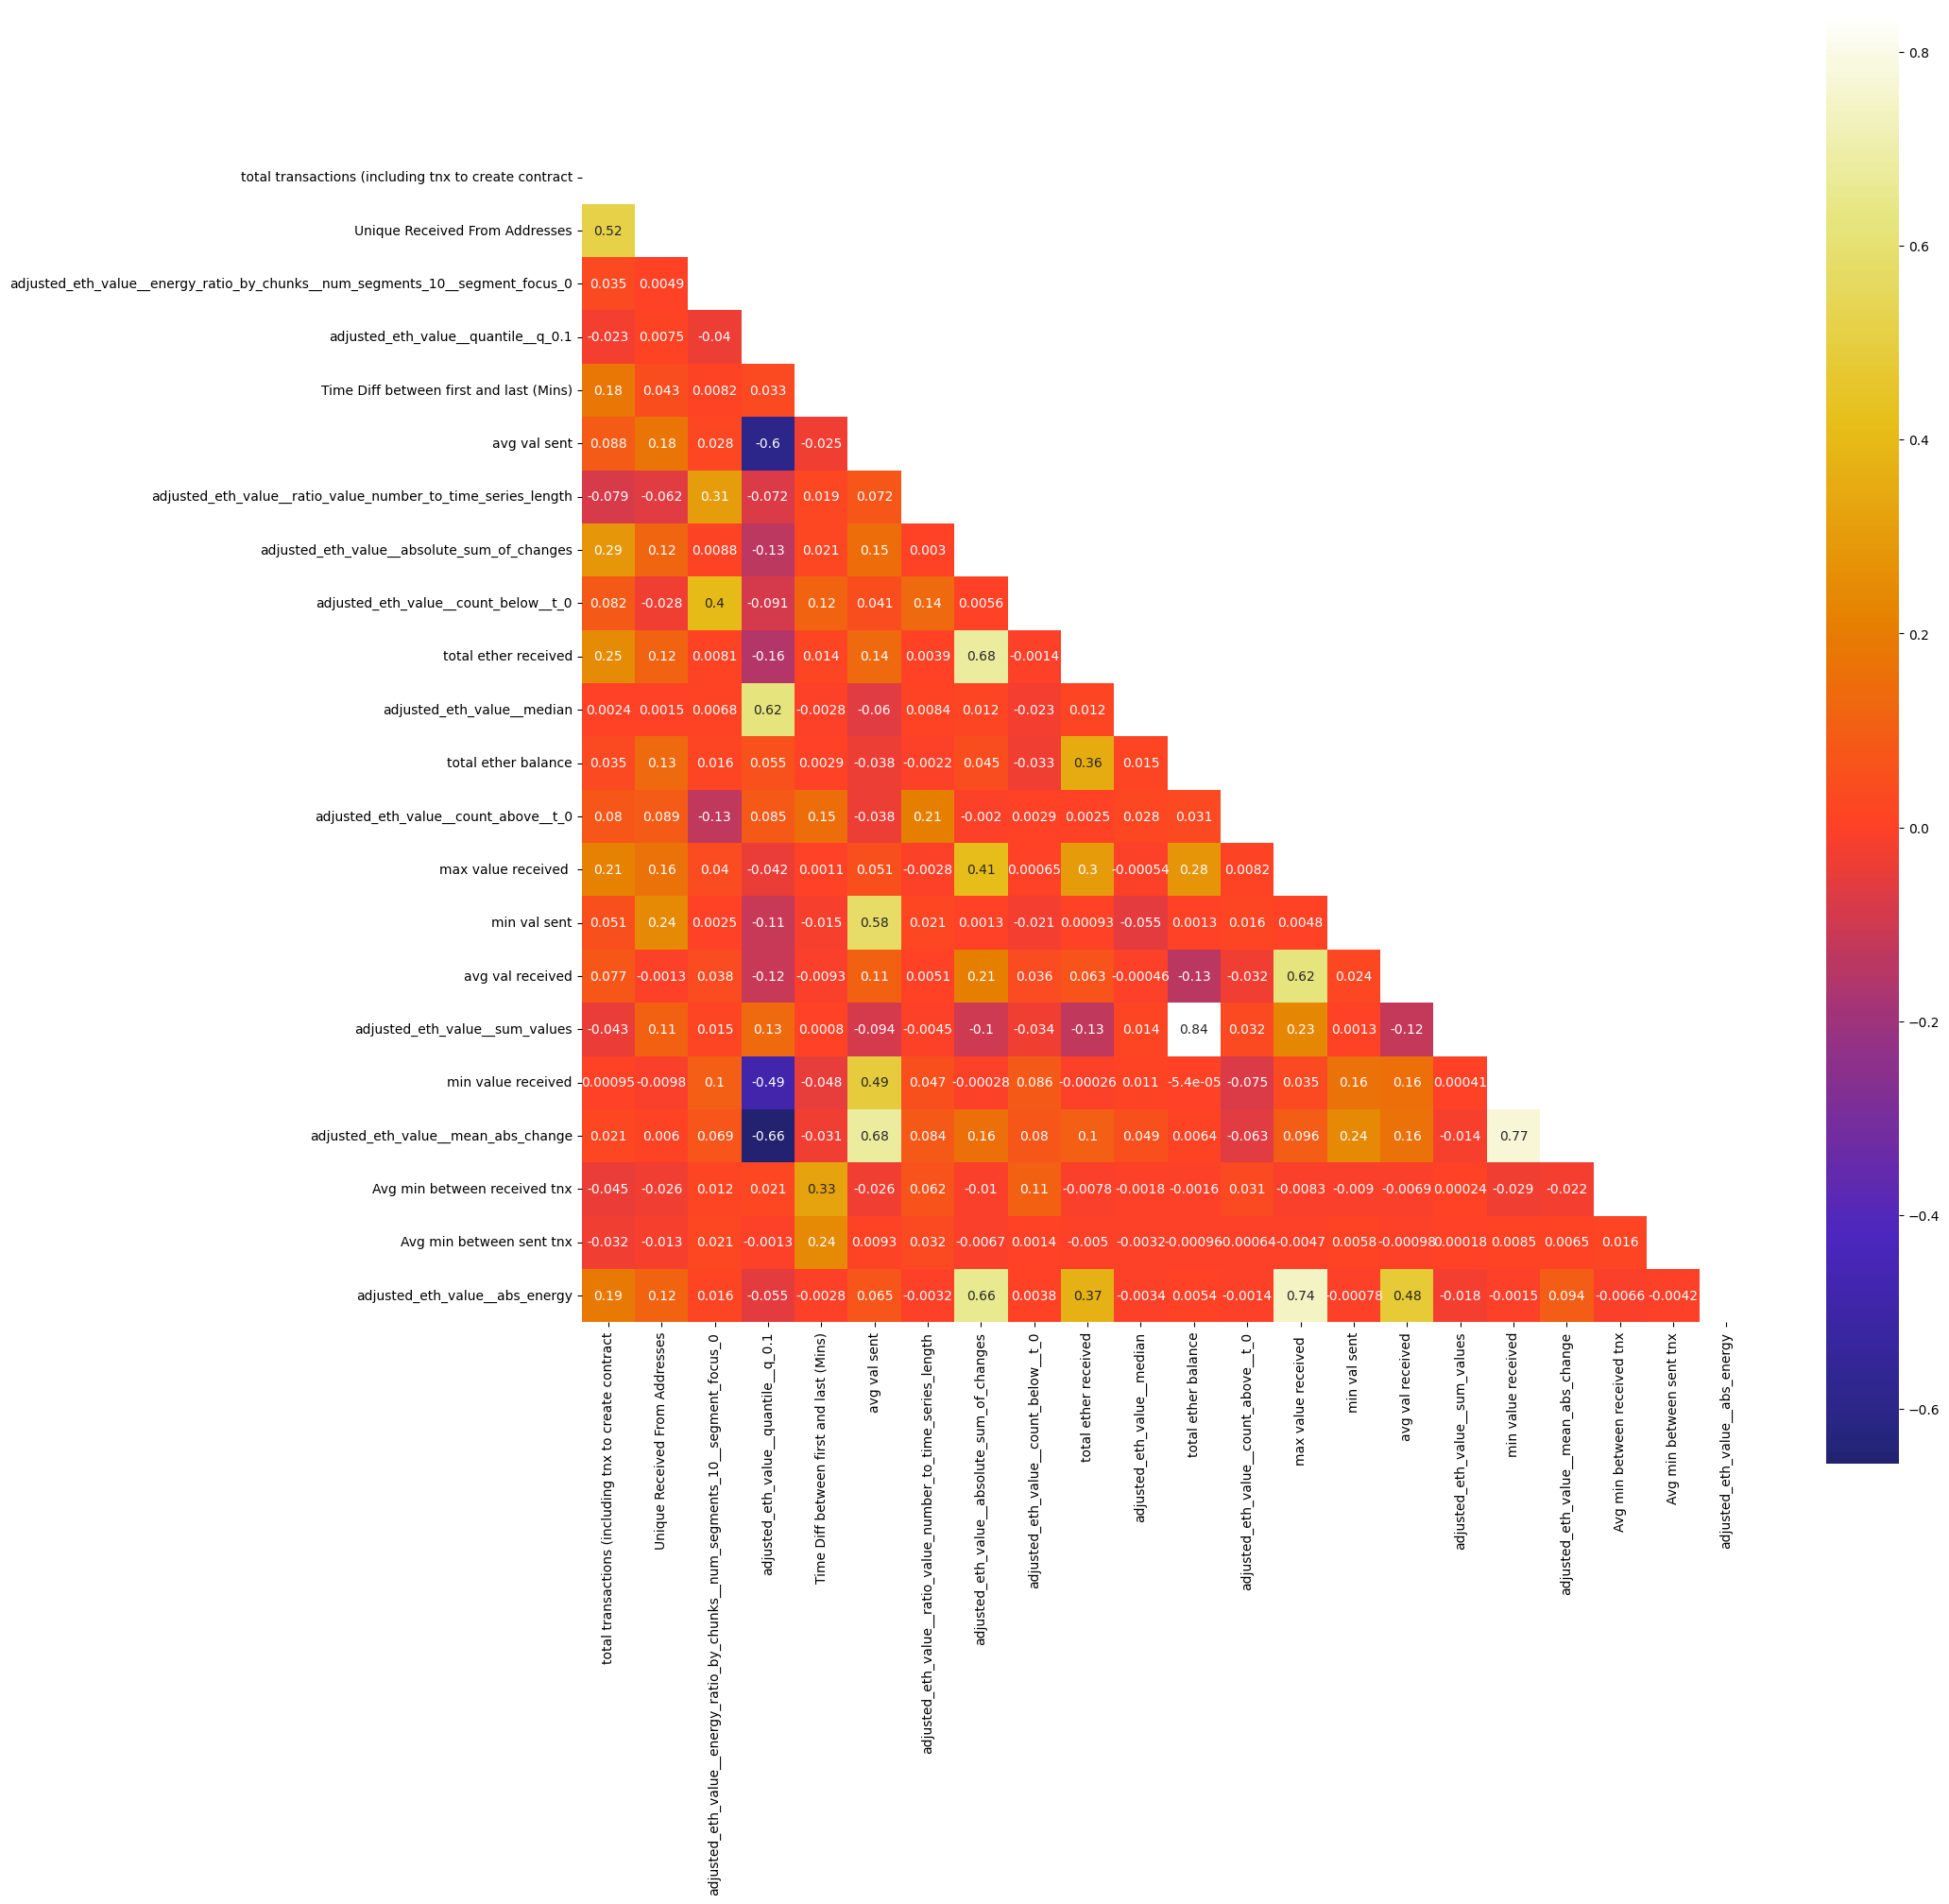

In [8]:
feature_list = list(set(df.columns) - set(['Address', 'Index', 'FLAG']))

corr = df[list(set(feature_list))].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(20, 20))
sns.heatmap(data=corr, mask=mask, square=True, annot=True, cmap='CMRmap', center=0)
plt.show()